In [307]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [347]:
##functions below are originally from https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic

def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

## create bins for age
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'youngAdult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middleAged'
    elif age <= 65:
        a = 'senior'
    else:
        a = 'elderly'
    return a

In [309]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

##concat both train and test data for data cleaning
trainrow = df_train.shape[0]
testrow = df_test.shape[0]
testids = df_test['PassengerId'].copy()
trainids = df_train['PassengerId'].copy()
y = df_train['Survived'].copy()

##X: complete set with no target variable
X = pd.concat((df_train, df_test)).reset_index(drop=True)
X = X.drop('Survived', axis = 1)
#X = X.drop('PassengerId', axis = 1)

##X_train: complete train set
X_train = X.iloc[:trainrow]
X_train['Survived'] = pd.Series(y)

In [310]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [311]:
X.select_dtypes(include='float').head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [312]:
X.select_dtypes(include='int').head()

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0


In [313]:
X.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [314]:
X['Title'] = X.Name.apply(lambda Name: Name.split(',')[1].split('.')[0].strip())

In [315]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [316]:
X.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Lady              1
the Countess      1
Mme               1
Capt              1
Jonkheer          1
Dona              1
Don               1
Sir               1
Name: Title, dtype: int64

In [317]:
generalizedTitle = {
    "Mr":                 "Mr",
    "Miss":               "Miss",
    "Mrs":                "Mrs",
    "Master":             "Master",
    "Rev":                "Officer",
    "Dr" :                "Officer",
    "Col":                "Officer",
    "Major":              "Officer",
    "Ms":                 "Miss",
    "Mlle":               "Miss",
    "Lady":               "Nobility",
    "the Countess":       "Nobility",
    "Mme":                "Miss",
    "Capt":               "Officer",
    "Jonkheer":           "Nobility",
    "Dona":               "Nobility",
    "Don":                "Nobility",
    "Sir":                "Nobility"
}
 
X['genTitle'] = X.Title.map(generalizedTitle)
print(X.genTitle.value_counts())

Mr          757
Miss        265
Mrs         197
Master       61
Officer      23
Nobility      6
Name: genTitle, dtype: int64


In [319]:
# group by Sex, Pclass, and Title 
grouped = X.groupby(['Sex', 'Pclass', 'genTitle'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  genTitle
female  1       Miss        30.0
                Mrs         45.0
                Nobility    39.0
                Officer     49.0
        2       Miss        20.0
                Mrs         30.5
        3       Miss        18.0
                Mrs         31.0
male    1       Master       6.0
                Mr          41.5
                Nobility    40.0
                Officer     52.0
        2       Master       2.0
                Mr          30.0
                Officer     41.5
        3       Master       6.0
                Mr          26.0
Name: Age, dtype: float64

In [320]:
X = X.drop(['Name', 'Title', 'Ticket'], axis = 1)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,genTitle
0,1,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,8.0500,NaN,S,Mr


In [333]:
missing_vals = X.isnull().sum().sort_values(ascending = False)
percent = ( X.isnull().sum()/X.isnull().count() ).sort_values(ascending = False)
missing_df = pd.concat([missing_vals, percent], axis = 1, keys = ["Total", "Percent"])
total_missing = missing_df[missing_df['Total'] > 0]
total_missing

,Total,Percent


In [322]:
# apply the grouped median value on the Age NaN
X.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [324]:
print(percent_value_counts(X, 'Embarked'))
X[X.Embarked.isnull()]

     Total  Percent
S      914    69.82
C      270    20.63
Q      123     9.40
NaN      2     0.15


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,genTitle
61,62,1,female,38.0,0,0,80.0,B28,NaN,Miss
829,830,1,female,62.0,0,0,80.0,B28,NaN,Mrs


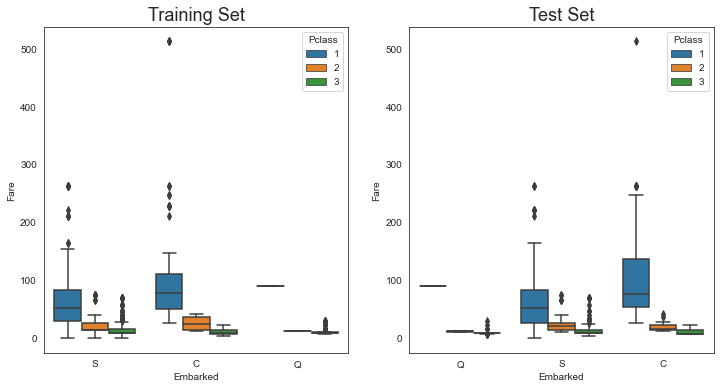

In [325]:
fig, ax = plt.subplots(figsize=(12,6),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=X_train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

In [326]:
X.Embarked.fillna("C", inplace=True)

In [328]:
X.Cabin = X.Cabin.fillna('U')

In [329]:
X.Cabin = [i[0] for i in X.Cabin]

In [330]:
X[X.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,genTitle
1043,1044,3,male,60.5,0,0,NaN,U,S,Mr


In [331]:
impute_value = X[(X.Pclass == 3) & 
                (X.Embarked == "S") & 
                 (X.genTitle == 'Mr') &
                (X.Sex == "male")].Fare.median()

In [332]:
X.Fare.fillna(impute_value, inplace=True)

In [334]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,genTitle
0,1,3,male,22.0,1,0,7.2500,U,S,Mr
1,2,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,7.9250,U,S,Miss
3,4,1,female,35.0,1,0,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,8.0500,U,S,Mr


## feature engineering

In [335]:
X['FamilySize'] = X.Parch + X.SibSp + 1

In [336]:
X['is_alone'] = [1 if i<2 else 0 for i in X.FamilySize]

In [337]:
X.Sex = X.Sex.map({"male": 0, "female":1})

In [339]:
# group by Sex, Pclass, and genTitle 
grouped = X.groupby(['Sex', 'Pclass', 'genTitle'])  
# view the median Age by the grouped features 
grouped.Fare.median()

Sex  Pclass  genTitle
0    1       Master      134.5000
             Mr           47.1000
             Nobility     27.7208
             Officer      37.5500
     2       Master       26.0000
             Mr           13.0000
             Officer      13.0000
     3       Master       22.3583
             Mr            7.8958
1    1       Miss         93.5000
             Mrs          78.2667
             Nobility     86.5000
             Officer      25.9292
     2       Miss         19.5000
             Mrs          26.0000
     3       Miss          8.0500
             Mrs          15.5000
Name: Fare, dtype: float64

In [340]:
np.where(X.Fare > 300)

(array([ 258,  679,  737, 1234]),)

In [341]:
X.Fare = np.where((X.PassengerId == 259), 93.5, X.Fare)

In [342]:
X.Fare = np.where((X.PassengerId == 680), 47.1, X.Fare)

In [343]:
X.Fare = np.where((X.PassengerId == 738), 47.1, X.Fare)

In [344]:
X.Fare = np.where((X.PassengerId == 1235), 78.27, X.Fare)

In [345]:
X.loc[ [258, 679, 737, 1234] , : ]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,genTitle,FamilySize,is_alone
258,259,1,1,35.0,0,0,93.50,U,C,Miss,1,1
679,680,1,0,36.0,0,1,47.10,B,C,Mr,2,0
737,738,1,0,35.0,0,0,47.10,B,C,Mr,1,1
1234,1235,1,1,58.0,0,1,78.27,B,C,Mrs,2,0


In [349]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,genTitle,FamilySize,is_alone,age_group
0,1,3,0,22.0,1,0,7.2500,U,S,Mr,2,0,youngAdult
1,2,1,1,38.0,1,0,71.2833,C,C,Mrs,2,0,adult
2,3,3,1,26.0,0,0,7.9250,U,S,Miss,1,1,youngAdult
3,4,1,1,35.0,1,0,53.1000,C,S,Mrs,2,0,youngAdult
4,5,3,0,35.0,0,0,8.0500,U,S,Mr,1,1,youngAdult


In [348]:
## Applying "age_group_fun" function to the "Age" column.
X['age_group'] = X['Age'].map(age_group_fun)

In [350]:
X = pd.get_dummies(X,columns=['Pclass', 'age_group', 'Embarked', 'FamilySize'], drop_first=False)

In [351]:
X.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Cabin,genTitle,is_alone,Pclass_1,Pclass_2,Pclass_3,age_group_adult,age_group_child,age_group_elderly,age_group_infant,age_group_middleAged,age_group_senior,age_group_teenager,age_group_toddler,age_group_youngAdult,Embarked_C,Embarked_Q,Embarked_S,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,1,0,22.0,1,0,7.2500,U,Mr,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,C,Mrs,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,U,Miss,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,C,Mrs,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,U,Mr,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0


In [352]:
X['normFare'] = np.log(X.Fare+1)

In [353]:
X.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Cabin,genTitle,is_alone,Pclass_1,Pclass_2,Pclass_3,age_group_adult,age_group_child,age_group_elderly,age_group_infant,age_group_middleAged,age_group_senior,age_group_teenager,age_group_toddler,age_group_youngAdult,Embarked_C,Embarked_Q,Embarked_S,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,normFare
0,1,0,22.0,1,0,7.2500,U,Mr,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,2.110213
1,2,1,38.0,1,0,71.2833,C,Mrs,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.280593
2,3,1,26.0,0,0,7.9250,U,Miss,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,2.188856
3,4,1,35.0,1,0,53.1000,C,Mrs,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,3.990834
4,5,0,35.0,0,0,8.0500,U,Mr,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,2.202765


In [354]:
X_train = X.iloc[:trainrow]

In [355]:
# adding saved target variable with train. 
X_train['Survived'] = y

In [356]:
X_train.shape

(891, 35)

In [357]:
X_train.columns

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'genTitle', 'is_alone', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'age_group_adult', 'age_group_child', 'age_group_elderly',
       'age_group_infant', 'age_group_middleAged', 'age_group_senior',
       'age_group_teenager', 'age_group_toddler', 'age_group_youngAdult',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize_1',
       'FamilySize_2', 'FamilySize_3', 'FamilySize_4', 'FamilySize_5',
       'FamilySize_6', 'FamilySize_7', 'FamilySize_8', 'FamilySize_11',
       'normFare', 'Survived'],
      dtype='object')

In [358]:
df_test = X.iloc[trainrow:]

In [359]:
df_test.shape

(418, 34)

In [360]:
X_train.to_csv('./data/train_ready3.csv', index=False)

In [361]:
df_test.to_csv('./data/test_ready3.csv', index=False)

In [362]:
df_test

,PassengerId,Sex,Age,SibSp,Parch,Fare,Cabin,genTitle,is_alone,Pclass_1,Pclass_2,Pclass_3,age_group_adult,age_group_child,age_group_elderly,age_group_infant,age_group_middleAged,age_group_senior,age_group_teenager,age_group_toddler,age_group_youngAdult,Embarked_C,Embarked_Q,Embarked_S,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,normFare
891,892,0,34.5,0,0,7.8292,U,Mr,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,2.178064
892,893,1,47.0,1,0,7.0000,U,Mrs,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2.079442
893,894,0,62.0,0,0,9.6875,U,Mr,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2.369075
894,895,0,27.0,0,0,8.6625,U,Mr,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,2.268252
895,896,1,22.0,1,1,12.2875,U,Mrs,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,2.586824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,26.0,0,0,8.0500,U,Mr,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,2.202765
1305,1306,1,39.0,0,0,108.9000,C,Nobility,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,4.699571
1306,1307,0,38.5,0,0,7.2500,U,Mr,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2.110213
1307,1308,0,26.0,0,0,8.0500,U,Mr,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,2.202765


In [363]:
X_train[X_train.age_group_infant == 1]

,PassengerId,Sex,Age,SibSp,Parch,Fare,Cabin,genTitle,is_alone,Pclass_1,Pclass_2,Pclass_3,age_group_adult,age_group_child,age_group_elderly,age_group_infant,age_group_middleAged,age_group_senior,age_group_teenager,age_group_toddler,age_group_youngAdult,Embarked_C,Embarked_Q,Embarked_S,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,normFare,Survived
78,79,0,0.83,0,2,29.0000,U,Master,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,3.401197,1
164,165,0,1.00,4,1,39.6875,U,Master,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3.705921,0
172,173,1,1.00,1,1,11.1333,U,Miss,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2.495954,1
183,184,0,1.00,2,1,39.0000,F,Master,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3.688879,1
305,306,0,0.92,1,2,151.5500,C,Master,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.027492,1
381,382,1,1.00,0,2,15.7417,U,Miss,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2.817903,1
386,387,0,1.00,5,2,46.9000,U,Master,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3.869116,0
469,470,1,0.75,2,1,19.2583,U,Miss,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3.008565,1
644,645,1,0.75,2,1,19.2583,U,Miss,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3.008565,1
755,756,0,0.67,1,1,14.5000,U,Master,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2.740840,1
